In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from math import comb
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *

In [2]:
m = 1000
d = 5
q = 2
active = fourier

ratio_train = 0.75

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    weight = np.concatenate((norm, norm), axis=-1)
    D = np.diag(1.0/weight**4)
    return D

In [3]:
X = make_X(d, m, dist=sphere)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [4]:
y = (1+np.linalg.norm(X, axis=-1))**(-0.5)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [5]:
ns = np.arange(10, 250, 10)

# Dense features

## No ensemble

In [6]:
results_l2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense.append(res)

[2.5173343167745684e-06, 2.1817519359366633e-07, 1.9297202643028204e-08, 3.4024500669500574e-08, 5.738068167751087e-08, 7.868846374124372e-08, 9.04654943311014e-08, 1.1536107092636384e-07, 1.1486514714762599e-07, 1.2674754498113995e-07, 1.2970274632591042e-07, 1.5017647746275212e-07, 1.4792159090535166e-07, 1.395498660686987e-07, 1.45853138659471e-07, 1.5509747831735563e-07, 1.5894681098443347e-07, 1.474743988758448e-07, 1.5147247711618344e-07, 1.6841508494614335e-07, 1.421329388871121e-07, 1.4596165357125718e-07, 1.7465643290708912e-07, 1.6103963282011978e-07]


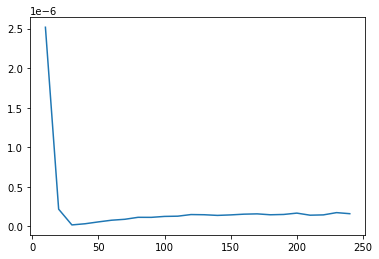

In [7]:
print([np.mean(res) for res in results_l2_dense])
plt.plot(ns, [np.mean(res) for res in results_l2_dense])

In [8]:
results_wl2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense.append(res)

[2.442545510429446e-06, 2.7504770165450775e-07, 2.7138646671055115e-08, 1.142865473525557e-08, 3.960976946895387e-09, 2.321415180202468e-09, 8.971111803277765e-10, 9.777155078833594e-10, 7.003377377398102e-10, 4.6197995383263433e-10, 5.369821753142443e-10, 3.865752407737879e-10, 3.9068642343807706e-10, 4.946701485514032e-10, 3.397277614897615e-10, 3.1729064908293246e-10, 3.216309113689642e-10, 2.978374584170084e-10, 4.3230180350278786e-10, 4.243622949319572e-10, 3.0043820903187865e-10, 3.809115896742543e-10, 6.90090101131011e-10, 3.798363631741894e-10]


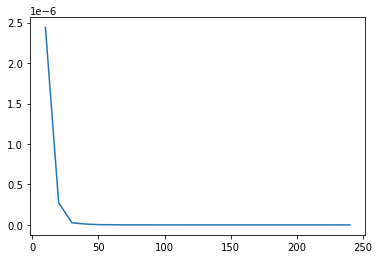

In [9]:
print([np.mean(res) for res in results_wl2_dense])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense])

## Ensemble

In [10]:
results_l2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense_ens.append(res)

[0.0009791970018967608, 0.0006612998793521115, 0.0007316617926619822, 0.0005295487666355668, 0.0005902789199757085, 0.000500353473543952, 0.0004902527687027078, 0.00045628379384968817, 0.00042801710653315745, 0.00043222418463980604, 0.00038863019026371537, 0.00040093236508712156, 0.00041591310627633134, 0.0003507034977917456, 0.0003863962905242176, 0.00034574998437462984, 0.0004160096095097073, 0.00035959567725172957, 0.00035223146531444826, 0.00037947455352448436, 0.0003676867486982963, 0.00036944639187840554, 0.00034797276240792086, 0.0003753810709045213]


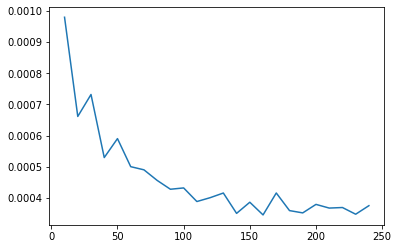

In [11]:
print([np.mean(res) for res in results_l2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_dense_ens])

In [12]:
results_wl2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense_ens.append(res)

[0.0010393832968101581, 0.0008214080367934914, 0.0007575605102812051, 0.0006664202158398105, 0.0005336184086676042, 0.0005389461343217568, 0.0004699116947994455, 0.0005284821756208624, 0.000463240357688967, 0.00040581823525147147, 0.00046230399090585564, 0.00038797217859129474, 0.00041341596466970077, 0.00038829155150891446, 0.0003761700091256835, 0.00039963754096619127, 0.00038296796543819305, 0.000379917025079771, 0.0003711365738639983, 0.0003573335709369686, 0.0003157041067109314, 0.00034006385500809204, 0.0003386080927711769, 0.00037744767259228893]


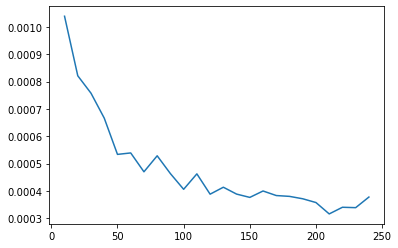

In [13]:
print([np.mean(res) for res in results_wl2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense_ens])

# Sparse features

## No ensemble

In [14]:
results_l2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse.append(res)

[5.286011186024464e-10, 4.45353146644376e-06, 0.00013822047671617214, 8.65995202409618e-05, 0.00013587416998765033, 8.751894477620123e-05, 9.156942423341362e-05, 5.9937470622188605e-05, 5.3749890855802284e-05, 4.823030167604779e-05, 1.9073557405746402e-05, 2.8051588070681184e-05, 1.4731236078990558e-05, 1.243770218908986e-05, 8.42777972244502e-06, 5.675139406889698e-06, 5.712326620848536e-06, 6.0308879192412765e-06, 4.104189385709207e-06, 3.204702315627315e-06, 2.1657872544747495e-06, 2.842524776654599e-06, 2.4565509048616363e-06, 1.6042158859566127e-06]


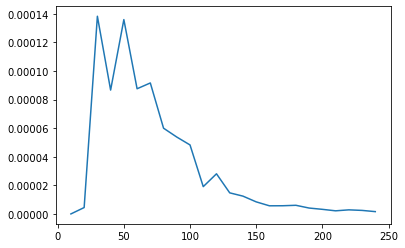

In [15]:
print([np.mean(res) for res in results_l2_sparse])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse])

In [16]:
results_wl2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse.append(res)

[4.962866820919243e-10, 2.4844488016081788e-08, 1.1785259040078385e-08, 9.780943209792321e-08, 4.581233508750273e-09, 1.850558366017654e-09, 1.8564389050454584e-09, 3.125592397644944e-09, 7.065439973561087e-09, 7.958340965261135e-10, 1.163224639912329e-08, 2.907100334095059e-08, 3.5054111301155705e-08, 2.3947035598585998e-08, 3.1720048423725515e-09, 8.997202327422856e-11, 5.846350786662666e-08, 9.291765089365992e-09, 2.2219518218331115e-08, 2.4599571687448403e-10, 4.0467018778952476e-08, 1.244031970013062e-08, 1.2409163543891558e-07, 5.012867259433497e-08]


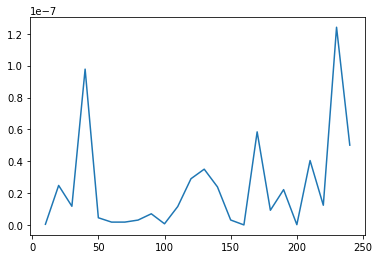

In [17]:
print([np.mean(res) for res in results_wl2_sparse])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse])

## Ensemble

In [18]:
results_l2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse_ens.append(res)

[0.00015392712770411006, 0.00013302822236502257, 9.088870380920887e-05, 7.950732410961035e-05, 6.82793525534496e-05, 8.034098119629149e-05, 6.074224872873906e-05, 5.471153914681344e-05, 5.8303530509659606e-05, 5.2928224596625185e-05, 5.9708678800416285e-05, 5.336852660002005e-05, 5.3272732253175075e-05, 5.003867076371924e-05, 4.8380203619534476e-05, 4.6170411812539026e-05, 4.438126409061589e-05, 4.314393706385957e-05, 3.6770029684377395e-05, 4.137127478940761e-05, 3.711002121657948e-05, 4.5932206298957985e-05, 4.3995851834166506e-05, 3.641993105331304e-05]


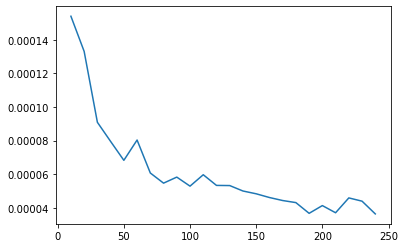

In [19]:
print([np.mean(res) for res in results_l2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse_ens])

In [20]:
results_wl2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse_ens.append(res)

[0.00018732689847939839, 0.00011515398398166398, 9.723300583191229e-05, 7.81209457947372e-05, 7.095104388002626e-05, 6.337710596197277e-05, 6.476152832253894e-05, 6.544933247720037e-05, 5.810706701176734e-05, 5.706923820443727e-05, 5.7738377784666704e-05, 4.851253901781102e-05, 4.47517479588874e-05, 4.532308564028802e-05, 4.8806220732309194e-05, 5.370221676361165e-05, 4.736657317815843e-05, 4.603586643476083e-05, 4.311380188473203e-05, 4.464119666539049e-05, 3.354415224929765e-05, 4.37197879900181e-05, 3.9196579250729524e-05, 3.6587941225232804e-05]


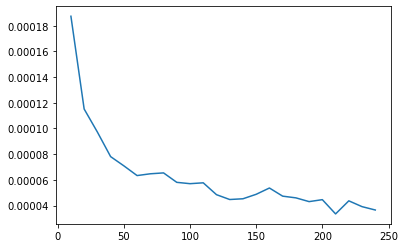

In [21]:
print([np.mean(res) for res in results_wl2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse_ens])